In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Here, want read the dataset to make some meaningful plots and better understand the dataset

In [15]:
df = pd.read_csv('merged_data.csv')
df.head()

,iCIK,iCUSIP,pSP_TICKER,iPERIOD_END,iQTY,iMARKET_VALUE,iLONG_FRACTION,pSP_VOLUME,pSP_OPEN,pSP_HIGH,pSP_LOW,pSP_CLOSE
0,1511857,494368103,KMB,2014-12-31,4581.0,529000.0,0.001076,1486101,117.01,117.44,115.36,115.54
1,1335977,494368103,KMB,2014-12-31,141434.0,16341000.0,0.002339,1486101,117.01,117.44,115.36,115.54
2,1056053,494368103,KMB,2014-12-31,630071.0,72799000.0,0.001214,1486101,117.01,117.44,115.36,115.54
3,1601489,494368103,KMB,2014-12-31,3840.0,444000.0,0.000847,1486101,117.01,117.44,115.36,115.54
4,1428601,494368103,KMB,2014-12-31,2085.0,241000.0,0.001134,1486101,117.01,117.44,115.36,115.54


In [16]:
df.shape

(18418300, 12)

In [18]:
# Column data types
dtypes = {
    'iCIK': 'int64',
    'iCUSIP': 'str',
    'pSP_TICKER': 'str',
    'iQTY': 'float64',
    'iMARKET_VALUE': 'float64',
    'iLONG_FRACTION': 'float64',
    'pSP_VOLUME': 'int64',
    'pSP_OPEN': 'float64',
    'pSP_HIGH': 'float64',
    'pSP_LOW': 'float64',
    'pSP_CLOSE': 'float64'
}

# Read data in chunks
chunksize = 500_000
file_path = 'merged_data.csv'  # Replace with your file path
summary_stats = []
for chunk in pd.read_csv(file_path, chunksize=chunksize, dtype=dtypes, parse_dates=['iPERIOD_END']):
    # Summary statistics for the current chunk
    chunk_summary = chunk.describe()
    summary_stats.append(chunk_summary)

# Combine summary statistics from all chunks
summary_stats_combined = pd.concat(summary_stats)

# Calculate the final summary statistics
final_summary_stats = summary_stats_combined.groupby(summary_stats_combined.index).agg(['mean', 'min', 'max'])

final_summary_stats

iCIK                                      iQTY                \
               mean           min           max          mean           min   
25%    9.363178e+05  8.736300e+05  1.040197e+06  6.050426e+03  3.246000e+03   
50%    1.223678e+06  1.056288e+06  1.434165e+06  2.783715e+04  1.655600e+04   
75%    1.491490e+06  1.386928e+06  1.633693e+06  1.466236e+05  8.796750e+04   
count  4.977919e+05  4.183000e+05  5.000000e+05  4.977919e+05  4.183000e+05   
max    1.795757e+06  1.776290e+06  1.812492e+06  6.158376e+08  2.582340e+08   
mean   1.152293e+06  1.003006e+06  1.299094e+06  4.722491e+05  2.538210e+05   
min    2.230000e+03  2.230000e+03  2.230000e+03  0.000000e+00  0.000000e+00   
std    4.232504e+05  3.889466e+05  4.698596e+05  3.679963e+06  2.278276e+06   

                    iMARKET_VALUE                             iLONG_FRACTION  \
                max          mean           min           max           mean   
25%    7.919000e+03  2.476818e+05  7.200000e+04  4.000000e+05       0.000027   
50%    3.680000e+04  1.068665e+06  4.070000e+05  1.843000e+06       0.000246   
75%    1.921278e+05  5.789576e+06  1.986000e+06  1.037600e+07       0.001607   
count  5.000000e+05  4.977919e+05  4.183000e+05  5.000000e+05  497791.891892   
max    9.272490e+08  2.056124e+11  1.596680e+10  8.131840e+11       1.000000   
mean   6.775420e+05  2.462621e+07  6.849710e+06  4.618344e+07       0.003583   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
std    5.333027e+06  4.969691e+08  5.316549e+07  1.694194e+09       0.019107   

       ...       pSP_OPEN       pSP_HIGH                                \
       ...            max           mean            min            max   
25%    ...      38.570000      22.612974       7.770000      39.050000   
50%    ...      79.070000      42.320232      17.461500      79.525000   
75%    ...     144.120000      75.043757      37.620000     146.570000   
count  ...  500000.000000  497791.891892  418300.000000  500000.000000   
max    ...  338750.000000  131104.322162     597.080000  340000.000000   
mean   ...     665.130512     218.571369      31.887328     668.841308   
min    ...       0.390000       0.036210       0.000000       0.408000   
std    ...   13028.665196    4194.479785      58.059960   13092.234601   

             pSP_LOW                                    pSP_CLOSE  \
                mean            min            max           mean   
25%        22.087322       7.120000      38.410000      22.374432   
50%        41.475459      16.300000      78.780000      41.917565   
75%        73.581657      36.490000     143.730000      74.340381   
count  497791.891892  418300.000000  500000.000000  497791.891892   
max    129576.409189     592.060000  337920.000000  130135.942162   
mean      215.539880      31.117110     664.375549     216.814590   
min         0.032185       0.000000       0.385000       0.033657   
std      4146.455595      57.382686   13026.160024    4164.754177   

                                     
                 min            max  
25%         7.430000      38.980000  
50%        16.830000      79.400000  
75%        37.290000     145.570000  
count  418300.000000  500000.000000  
max       592.510000  339590.000000  
mean       31.590002     666.147006  
min         0.000000       0.400000  
std        57.710863   13044.639977  

[8 rows x 27 columns]

### The summary statistics might be hard to interpret, but "count" shows us that the dataset contains some missing values, now filter the data

In [19]:
# Read data in chunks
chunksize = 500_000
file_path = 'merged_data.csv'  # Replace with your file path
filtered_data = []
missing_data_stats = []
for chunk in pd.read_csv(file_path, chunksize=chunksize, dtype=dtypes, parse_dates=['iPERIOD_END']):
    
    missing_data = chunk.isnull().sum()
    missing_data_stats.append(missing_data)
    
    # Remove duplicates
    chunk.drop_duplicates(inplace=True)
    
    # Remove records with iQTY equal to zero
    chunk = chunk[chunk['iQTY'] != 0]
    
    # Remove records with iMARKET_VALUE equal to zero
    chunk = chunk[chunk['iMARKET_VALUE'] != 0]
    
    # Remove records filed before June 30, 2013
    chunk = chunk[chunk['iPERIOD_END'] >= '2013-01-30']
    
    # Append the filtered chunk
    filtered_data.append(chunk)

# Concatenate filtered chunks into a single DataFrame
filtered_data = pd.concat(filtered_data)

# Combine missing data statistics
missing_data_stats_combined = pd.concat(missing_data_stats, axis=1)
final_missing_data_stats = missing_data_stats_combined.sum(axis=1)

print("Missing data count:")
print(final_missing_data_stats)

filtered_data['daily_return'] = (filtered_data['pSP_CLOSE'] - filtered_data['pSP_OPEN']) / filtered_data['pSP_OPEN']
print(filtered_data.head())
print(filtered_data.shape)

Missing data count:
iCIK              0
iCUSIP            0
pSP_TICKER        0
iPERIOD_END       0
iQTY              0
iMARKET_VALUE     0
iLONG_FRACTION    0
pSP_VOLUME        0
pSP_OPEN          0
pSP_HIGH          0
pSP_LOW           0
pSP_CLOSE         0
dtype: int64
      iCIK     iCUSIP pSP_TICKER iPERIOD_END      iQTY  iMARKET_VALUE  \
0  1511857  494368103        KMB  2014-12-31    4581.0       529000.0   
1  1335977  494368103        KMB  2014-12-31  141434.0     16341000.0   
2  1056053  494368103        KMB  2014-12-31  630071.0     72799000.0   
3  1601489  494368103        KMB  2014-12-31    3840.0       444000.0   
4  1428601  494368103        KMB  2014-12-31    2085.0       241000.0   

   iLONG_FRACTION  pSP_VOLUME  pSP_OPEN  pSP_HIGH  pSP_LOW  pSP_CLOSE  \
0        0.001076     1486101    117.01    117.44   115.36     115.54   
1        0.002339     1486101    117.01    117.44   115.36     115.54   
2        0.001214     1486101    117.01    117.44   115.36     115.54

In [20]:
print("Number of unique iCIK:", len(filtered_data['iCIK'].unique()))
print("Number of unique ICUSIP:", len(filtered_data['iCUSIP'].unique()))
print("Number of unique iPERIOD_END:", len(filtered_data['iPERIOD_END'].unique()))

Number of unique iCIK: 7034
Number of unique ICUSIP: 14365
Number of unique iPERIOD_END: 19


In [21]:
unique_periods = filtered_data['iPERIOD_END'].unique()
print(unique_periods)

['2014-12-31T00:00:00.000000000' '2014-09-30T00:00:00.000000000'
 '2014-06-30T00:00:00.000000000' '2014-03-31T00:00:00.000000000'
 '2013-12-31T00:00:00.000000000' '2013-09-30T00:00:00.000000000'
 '2015-03-31T00:00:00.000000000' '2015-06-30T00:00:00.000000000'
 '2015-09-30T00:00:00.000000000' '2015-12-31T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2016-06-30T00:00:00.000000000'
 '2016-09-30T00:00:00.000000000' '2017-03-31T00:00:00.000000000'
 '2017-06-30T00:00:00.000000000' '2018-12-31T00:00:00.000000000'
 '2019-09-30T00:00:00.000000000' '2019-12-31T00:00:00.000000000'
 '2020-03-31T00:00:00.000000000']


In [7]:
#make some meaningful plots

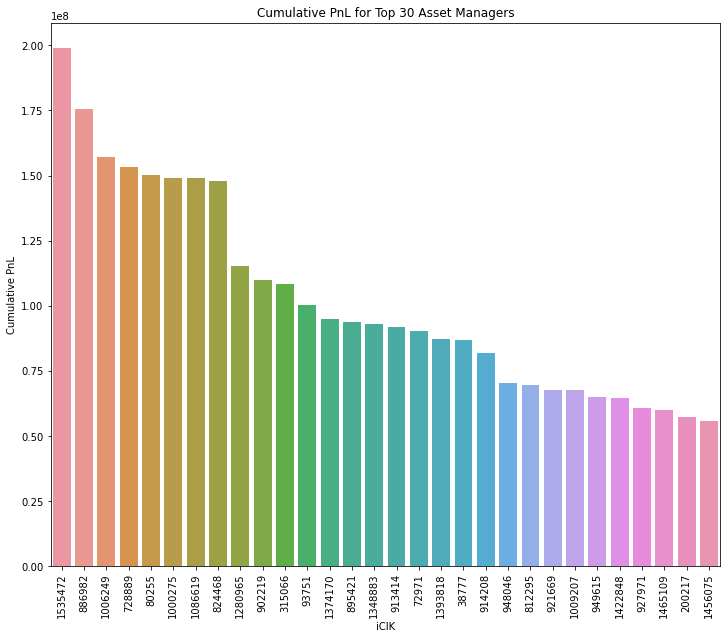

In [22]:
file_path = 'merged_data.csv'
chunksize = 10 ** 6
dtypes = {'iCIK': 'int64', 'iCUSIP': 'str', 'pSP_TICKER': 'str', 'iQTY': 'float64', 'iMARKET_VALUE': 'float64', 'iLONG_FRACTION': 'float64', 'pSP_VOLUME': 'int64', 'pSP_OPEN': 'float64', 'pSP_HIGH': 'float64', 'pSP_LOW': 'float64', 'pSP_CLOSE': 'float64'}
parse_dates = ['iPERIOD_END']

daily_PnL_list = []

for chunk in pd.read_csv(file_path, chunksize=chunksize, dtype=dtypes, parse_dates=parse_dates):
    chunk = chunk.drop_duplicates()
    chunk = chunk[chunk['iQTY'] != 0]
    chunk = chunk[chunk['iMARKET_VALUE'] != 0]
    chunk = chunk[chunk['iPERIOD_END'] >= '2013-01-30']
    chunk['daily_returns'] = (chunk['pSP_CLOSE'] - chunk['pSP_OPEN']) / chunk['pSP_OPEN']
    chunk['daily_PnL'] = chunk['iQTY'] * chunk['daily_returns']
    daily_PnL_by_manager = chunk.groupby(['iCIK', 'iPERIOD_END'])['daily_PnL'].sum().reset_index()
    daily_PnL_list.append(daily_PnL_by_manager)

# Concatenate all the chunks
all_daily_PnL = pd.concat(daily_PnL_list, ignore_index=True)

# Calculate overall cumulative PnL for each asset manager
overall_cumulative_PnL = all_daily_PnL.groupby('iCIK')['daily_PnL'].sum().sort_values(ascending=False)

# Get the top 50 asset managers
top_30_cumulative_PnL = overall_cumulative_PnL.head(30)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_30_cumulative_PnL.index.astype(str), y=top_30_cumulative_PnL.values)
plt.title('Cumulative PnL for Top 30 Asset Managers')
plt.xlabel('iCIK')
plt.ylabel('Cumulative PnL')
plt.xticks(rotation=90)
plt.show()



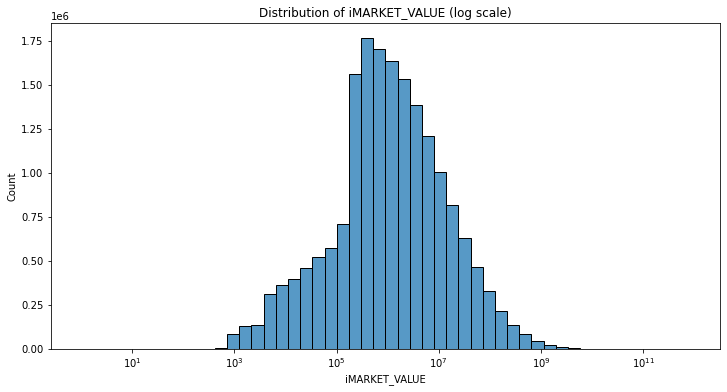

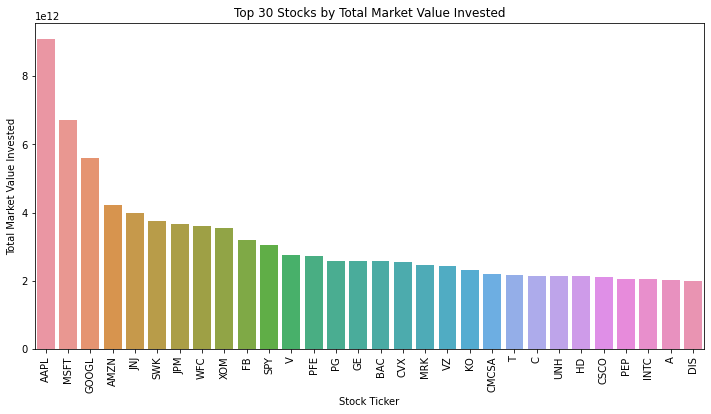

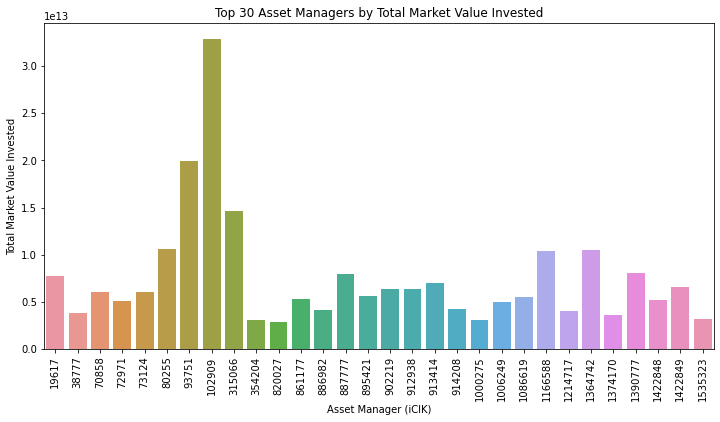

In [23]:
# Plot the iMARKET_VALUE distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='iMARKET_VALUE', bins=50, log_scale=True)
plt.title('Distribution of iMARKET_VALUE (log scale)')
plt.xlabel('iMARKET_VALUE')
plt.ylabel('Count')
plt.show()

# Group the data by ticker and sum the market value
total_market_value_stocks = {}
for ticker, value in filtered_data.groupby('pSP_TICKER')['iMARKET_VALUE'].sum().items():
    total_market_value_stocks[ticker] = total_market_value_stocks.get(ticker, 0) + value

# Sort the data by total market value in descending order and take the top 30 stocks
top_stocks = pd.DataFrame(list(total_market_value_stocks.items()), columns=['pSP_TICKER', 'Total Market Value Invested'])
top_stocks = top_stocks.sort_values(by='Total Market Value Invested', ascending=False).head(30)

# Plot the total market value for the top 30 stocks
plt.figure(figsize=(12, 6))
sns.barplot(data=top_stocks, x='pSP_TICKER', y='Total Market Value Invested')
plt.title('Top 30 Stocks by Total Market Value Invested')
plt.xlabel('Stock Ticker')
plt.ylabel('Total Market Value Invested')
plt.xticks(rotation=90)
plt.show()

# Group the data by iCIK and sum the market value
total_market_value_managers = {}
for manager, value in filtered_data.groupby('iCIK')['iMARKET_VALUE'].sum().items():
    total_market_value_managers[manager] = total_market_value_managers.get(manager, 0) + value

# Sort the data by total market value in descending order and take the top 30 managers
top_managers = pd.DataFrame(list(total_market_value_managers.items()), columns=['iCIK', 'Total Market Value Invested'])
top_managers = top_managers.sort_values(by='Total Market Value Invested', ascending=False).head(30)

# Plot the total market value for the top 30 asset managers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_managers, x='iCIK', y='Total Market Value Invested')
plt.title('Top 30 Asset Managers by Total Market Value Invested')
plt.xlabel('Asset Manager (iCIK)')
plt.ylabel('Total Market Value Invested')
plt.xticks(rotation=90)
plt.show()



In [24]:
top_managers

,iCIK,Total Market Value Invested
88,102909,3.289996e+13
80,93751,1.996849e+13
120,315066,1.462406e+13
73,80255,1.056356e+13
2270,1364742,1.055463e+13
1491,1166588,1.038828e+13
2458,1390777,8.092534e+12
447,887777,7.937134e+12
18,19617,7.779262e+12
527,913414,6.995609e+12


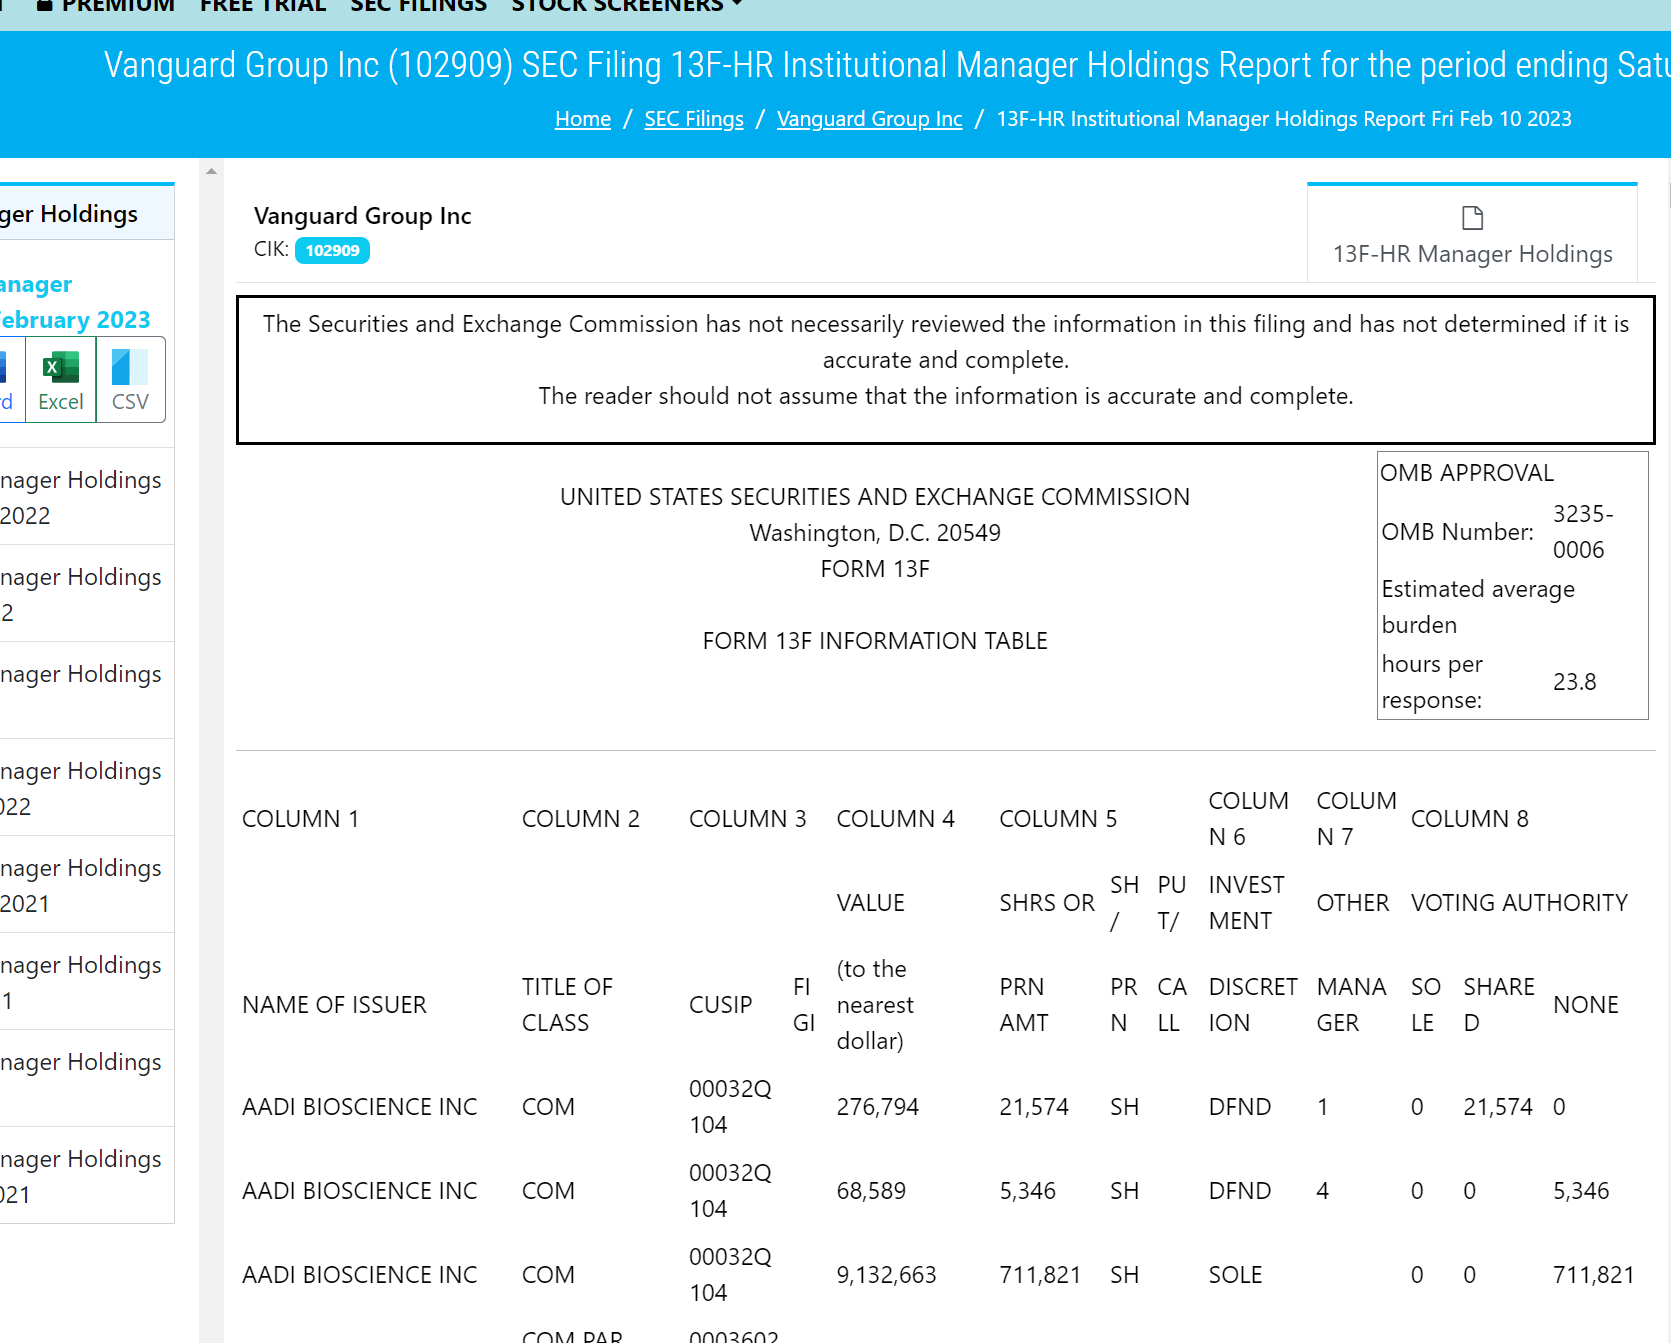

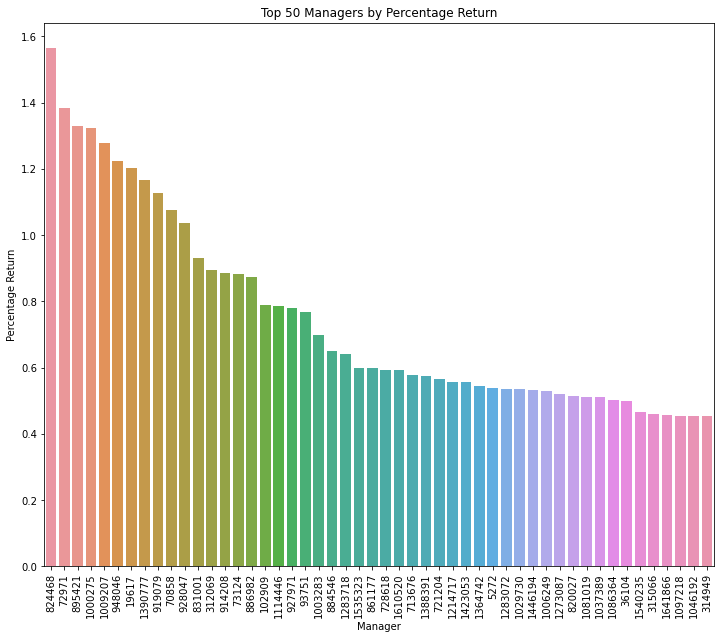

In [25]:
# Group the data by iCIK and calculate the total return
total_return_by_manager = filtered_data.groupby('iCIK')['daily_return'].sum().reset_index()
total_return_by_manager.sort_values(by='daily_return', ascending=False, inplace=True)  # Sort by daily return
total_return_by_manager['percentage_return'] = total_return_by_manager['daily_return'] * 100 / total_return_by_manager['daily_return'].sum()

# Plot the top 10 managers by percentage return
plt.figure(figsize=(12, 10))
top_managers = total_return_by_manager.head(50)
sns.barplot(data=top_managers, x='iCIK', y='percentage_return', order=top_managers['iCIK'])
plt.xlabel('Manager')
plt.ylabel('Percentage Return')
plt.title('Top 50 Managers by Percentage Return')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()



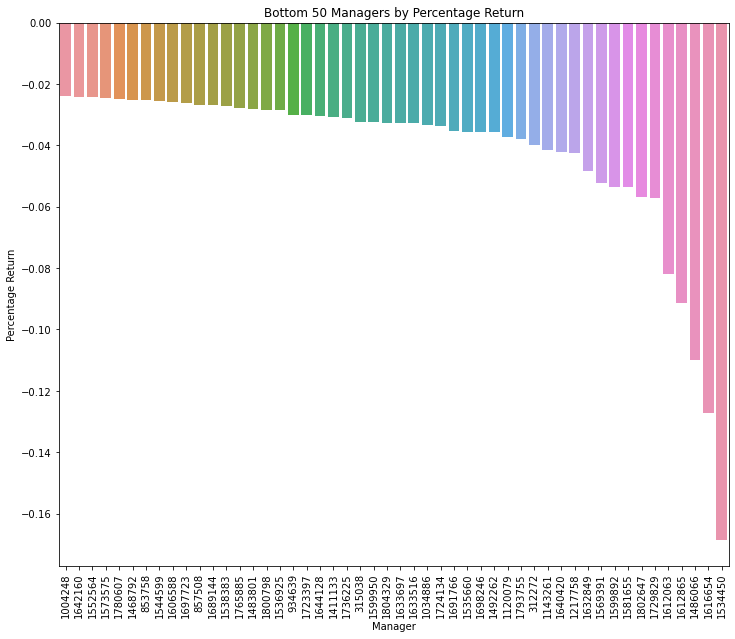

In [26]:
# Group the data by iCIK and calculate the total return
total_return_by_manager = filtered_data.groupby('iCIK')['daily_return'].sum().reset_index()
total_return_by_manager.sort_values(by='daily_return', ascending=False, inplace=True)  # Sort by daily return
total_return_by_manager['percentage_return'] = total_return_by_manager['daily_return'] * 100 / total_return_by_manager['daily_return'].sum()

# Plot the bottom 50 managers by percentage return
plt.figure(figsize=(12, 10))
bottom_managers = total_return_by_manager.tail(50)
sns.barplot(data=bottom_managers, x='iCIK', y='percentage_return', order=bottom_managers['iCIK'])
plt.xlabel('Manager')
plt.ylabel('Percentage Return')
plt.title('Bottom 50 Managers by Percentage Return')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()



In [27]:
## Save the data
# Sort the filtered_data DataFrame by iPERIOD_END and iCUSIP columns
filtered_data = filtered_data.sort_values(['iPERIOD_END', 'iCIK'], ascending=[True, True])

# Save the filtered_data DataFrame to a CSV file
filtered_data.to_csv('filtered_data.csv', index=False)
